# Lista 1

## Questão 2

# Funções de Bessel

Temos que a função de Bessel de primeira espécie é definida como sendo: <br>

$J_{p}(x) = \sum_{n=1}^{\infty} \frac{(-1)^n}{n! (n+p)!} (\frac{x}{2})^{2n+p}$

Temos que as derivadas de primeira e segunda ordem da função de Bessel $J_1$ são descritas como: <br>
$\frac{d(J_{1})}{dx} = J_{0}(x) - \frac{1}{x}J_{1}(x)$

$\frac{d^2(J_{1})}{dx^2} = J_{1}(x)(\frac{2}{x^2}-1) - J_{0}(x)(\frac{1}{x})$

# Aproximações das derivadas através de diferenças finitas

$i)$ A proximação central com 3 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{J_{1}(i+1) - J_{1}(i-1)}{2\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{J_{1}(i-1) - 2J_{1}(i) + J_{1}(i+1)}{\Delta x^2} $

$ii)$ A proximação Forward com 3 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{-3J_{1}(i) + 4J_{1}(i+1) - J_{1}(i+2)}{2\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{J_{1}(i) - 2J_{1}(i+1) + J_{1}(i+2)}{\Delta x^2} $

$iii)$ A proximação central com 5 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{J_{1}(i+2) - J_{1}(i-2)}{4\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{J_{1}(i+2) + J_{1}(i-2) - 2J_{1}(i)}{4\Delta x^2} $

$vi)$ A proximação backward com 3 pontos: <br>

$\left.\frac{d(J_{1}(x))}{dx}\right|_{x=x_i} = \frac{-4J_{1}(i-1) + 3J_{1}(i) + J_{1}(i-2)}{2\Delta x} $

$\left.\frac{d^2(J_{1}(x))}{dx^2}\right|_{x=x_i} = \frac{-2J_{1}(i-1) + J_{1}(i) + J_{1}(i-2)}{\Delta x^2} $




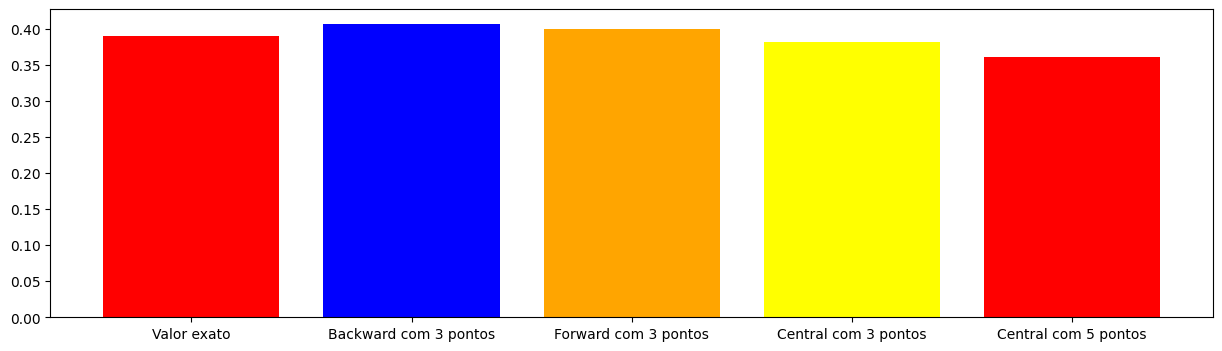

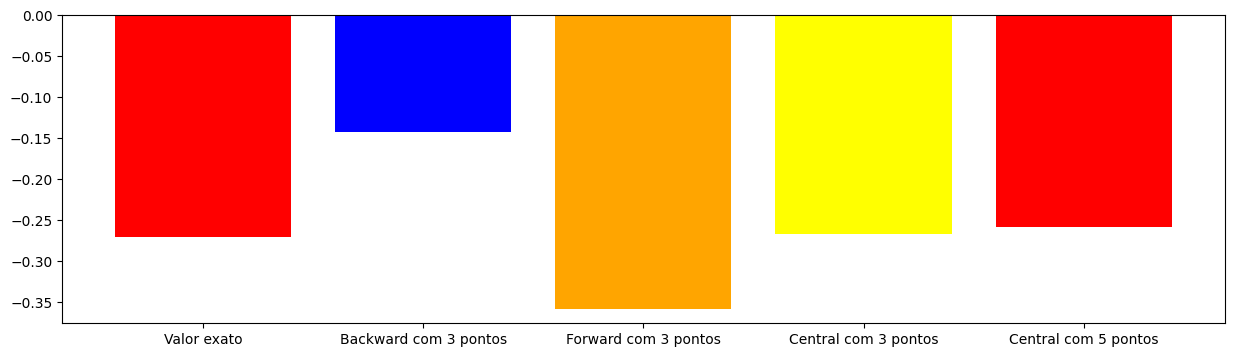

In [ ]:
import scipy as sp
import math as mt
import matplotlib.pyplot as plt

# Função de Bessel
def J (p, x):
    return sp.special.jv(p, x)

# Ponto de interesse
x = mt.pi / 4
delta_x = mt.pi / 4

# Valores exatos das derivadas da função J1 no ponto x = pi/4
# Primeira derivada
dj_dx_ex = J(0,x) - ((1 / x) * J(1,x))

# Segunda Derivada
dj2_dx2_ex = (J(1,x) * ((2/(x ** 2)) - 1)) - ((1/x) * J(0,x))

# a) Aproximação Backward com 3 pontos
dj_dx_b = ((-4 * J(1,(x - (delta_x/2)))) + (3 * J(1,x)) + J(1, (x - delta_x))) / (2 * (delta_x / 2))
dj2_dx2_b = ((-2 * J(1,(x - (delta_x/2)))) + (1 * J(1,x)) + J(1, (x - delta_x))) / ((delta_x / 2) ** 2)

# b) Aproximação Forward com 3 pontos
dj_dx_f = ((-3 * J(1,x)) + (4 * J(1,(x + (delta_x / 2)))) - J(1, (x + delta_x))) / (2 * (delta_x / 2))
dj2_dx2_f = ((1 * J(1,x)) - (2 * J(1, (x + (delta_x / 2)))) + J(1, (x + delta_x))) / ((delta_x / 2) ** 2)

# c) Aproximação Central com 3 pontos
dj_dx_c3 = ((1 * J(1,(x + (delta_x / 2)))) - J(1, (x - (delta_x / 2)))) / (2 * (delta_x / 2))
dj2_dx2_c3 = ((1 * J(1, x - (delta_x / 2))) - (2 * J(1, x)) + J(1, (x + (delta_x / 2)))) / ((delta_x / 2) ** 2)

# d) Aproximação Central com 5 pontos
dj_dx_c5 = ((1 * J(1,(x + delta_x))) - J(1, (x - delta_x))) / (4 * (delta_x / 2))
dj2_dx2_c5 = ((1 * J(1, (x + delta_x))) + (1 * J(1, (x - delta_x))) - ( 2 * J(1, x))) / (4 * ((delta_x / 2) ** 2))

# Apresentação dos resultados
#Primeira derivada
fig, ax = plt.subplots(figsize = (15,4))
fig, bx = plt.subplots(figsize = (15,4))

abordagens = ['Valor exato', 'Backward com 3 pontos', 'Forward com 3 pontos', 'Central com 3 pontos', 'Central com 5 pontos']
resultados_1 = [dj_dx_ex, dj_dx_b, dj_dx_f, dj_dx_c3, dj_dx_c5]
resultados_2 = [dj2_dx2_ex, dj2_dx2_b, dj2_dx2_f, dj2_dx2_c3, dj2_dx2_c5]
bar_colors = ['red', 'blue', 'orange', 'yellow'] 

ax.bar(abordagens, resultados_1, label = abordagens , color = bar_colors)
bx.bar(abordagens, resultados_2, label = abordagens , color = bar_colors)
plt.show()


# Questão 3

/tmp/ipykernel_1264/4124910707.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  si.io.imshow(original_fig)


[<function df_dx at 0x7f29e3f1d440> <function df_dx at 0x7f29e3f1d440>
 <function df_dx at 0x7f29e3f1d440> ... <function df_dx at 0x7f29e3f1d440>
 <function df_dx at 0x7f29e3f1d440> <function df_dx at 0x7f29e3f1d440>]


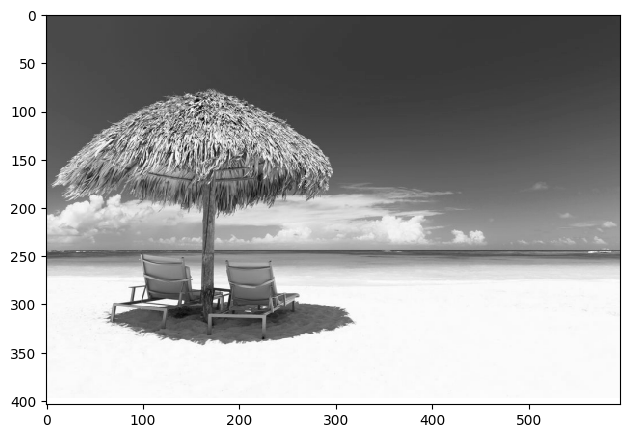

In [108]:
import skimage as si
import matplotlib.pyplot as plt
import skimage.color as sc
import numpy as np

original_fig = si.io.imread("Figure_lista.png", as_gray=True)
si.io.imshow(original_fig)
M = np.asarray(original_fig)

# Aproximação daa primeira derivada
def df_dx (x_f, x_b ):
    delta_x_fig = 1
    return (x_f - x_b) / (2*delta_x_fig)
# (1,1)
#central = M[1,1]
#further = M[200,2]
#back = M[0,0]
#print(df_dx (further, back))

# Loop de iteração 
#M.shape[1] #Numero de colunas
#M.shape[0] #Numero de linhas

grad = []

for i in range(0,(M.shape[0]),1):
    for j in range (1, (M.shape[1]-1)):
        df_dx(M[i,(j-1)], M[i,j+1])
        grad.append(df_dx)

Vetor_gradiente = np.array(grad)#Vetor gradiente
print(Vetor_gradiente)









